In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

data = pd.read_csv('data.csv')

data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [111]:
# shape of the data

data.shape

(569, 33)

### Pre-Processing

In [112]:
for col in data.columns:
    if data[col].isna().sum() > 0:
        print(col, data[col].isna().sum())

# drop the unnamed column
data.drop('Unnamed: 32', axis=1, inplace=True)


Unnamed: 32 569


### Distribution of Diagnosis

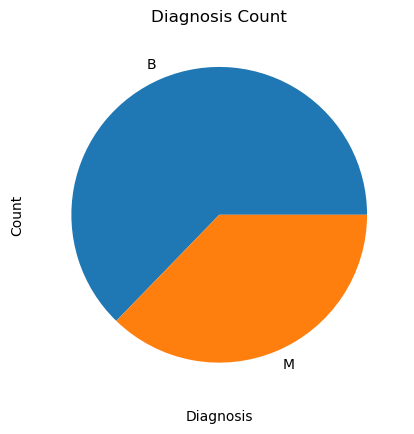

In [113]:
data['diagnosis'].value_counts().plot(kind='pie')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Diagnosis Count')
plt.show()

### Correlation Analysis

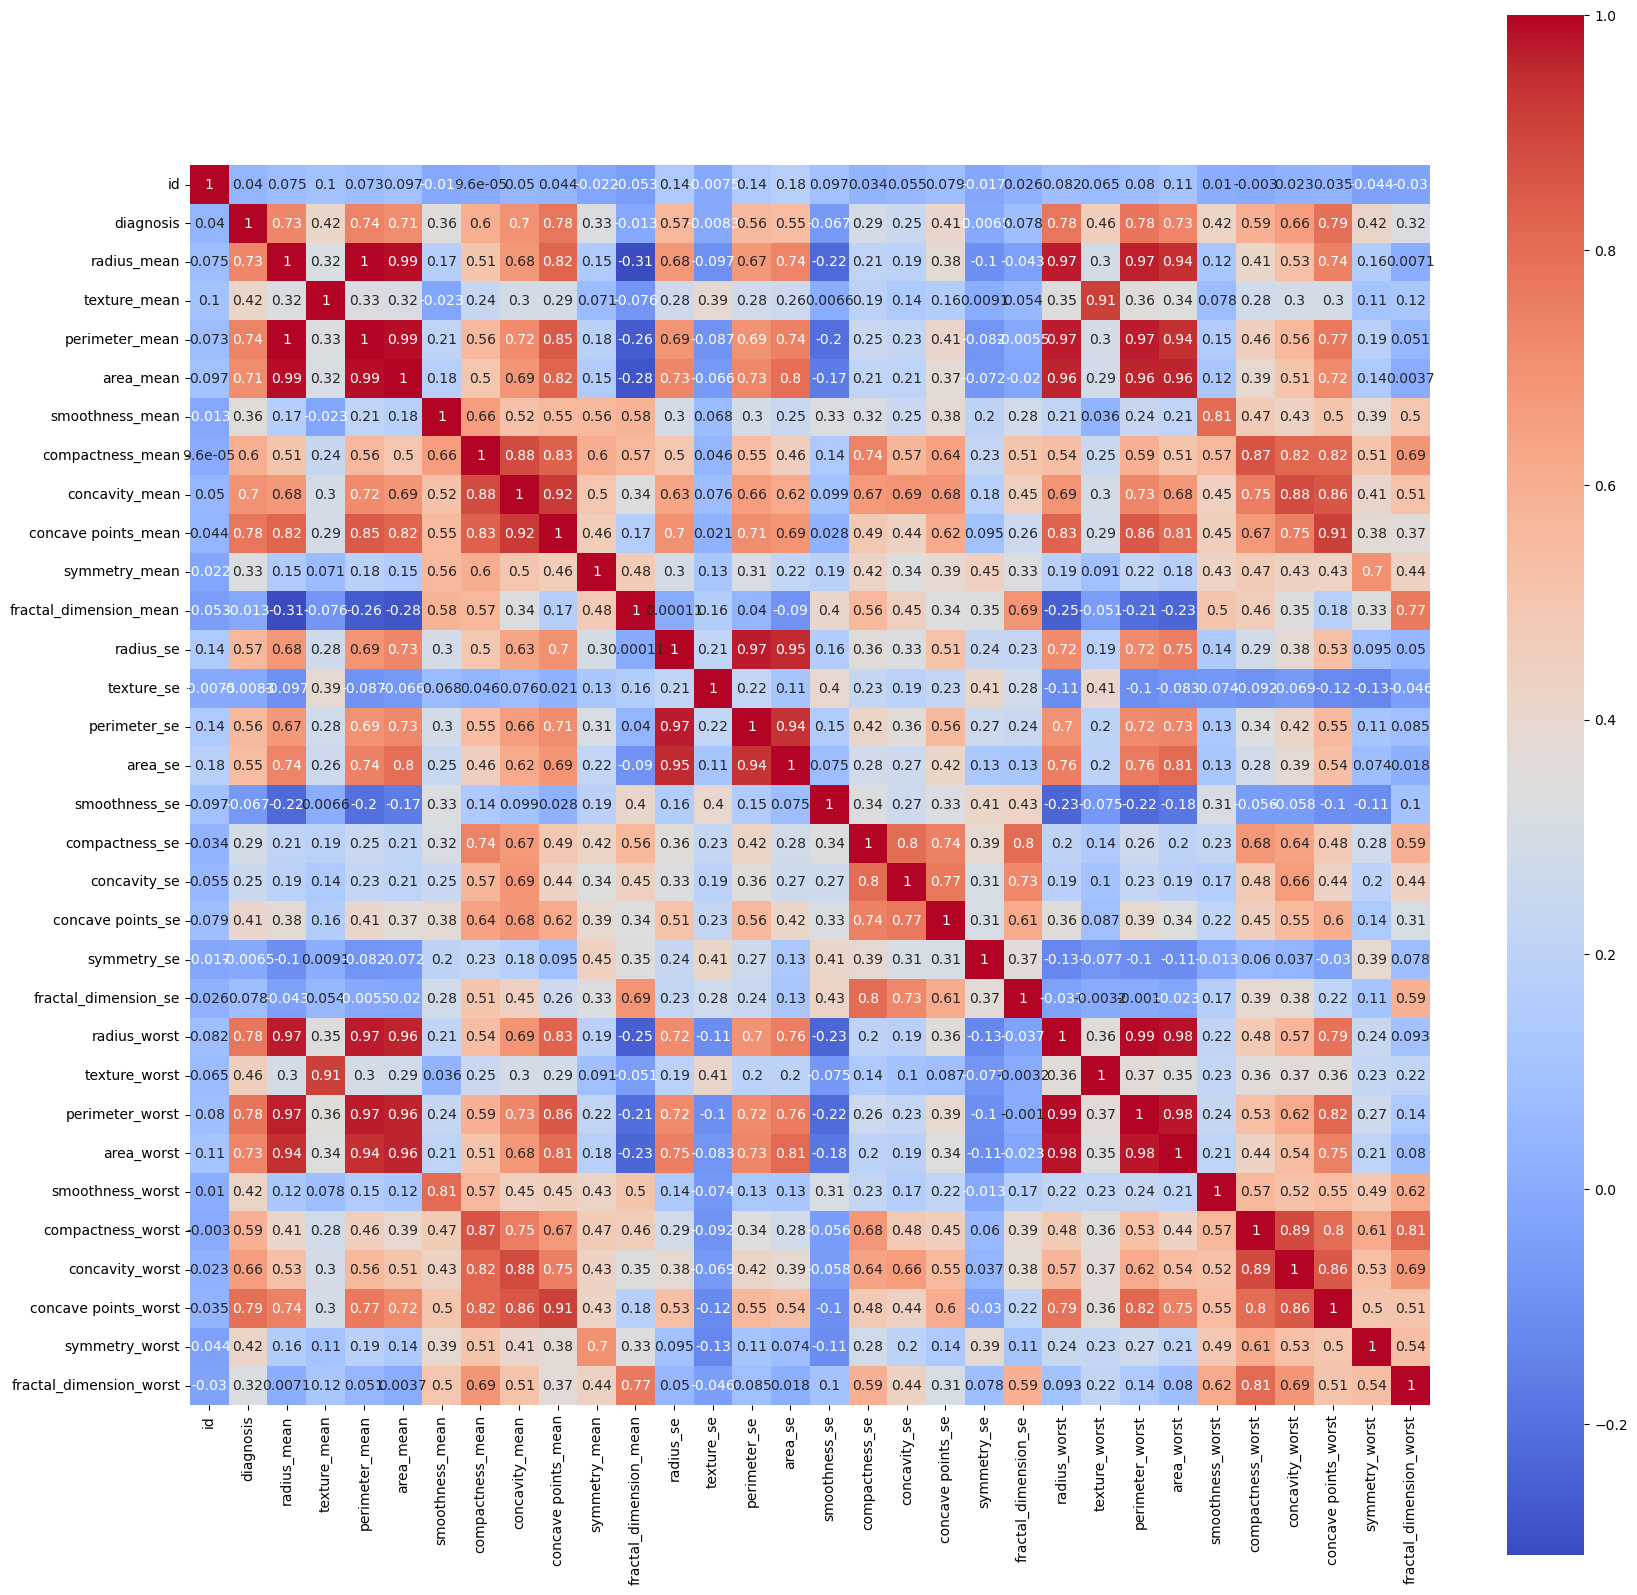

In [114]:
# correlation matrix

dataset = data.copy()

# convert the categorical data into numerical data
dataset['diagnosis'] = dataset['diagnosis'].map({'M':1, 'B':0})

corr = dataset.corr()

plt.figure(figsize=(20,20))

sns.heatmap(corr, annot=True, square=True, cmap='coolwarm')

plt.show()

In [115]:
important_features = [col for col in corr.columns if corr['diagnosis'][col] > 0.7]
important_features.remove('diagnosis')

print(important_features)

['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


### Numerical Feature Distribution

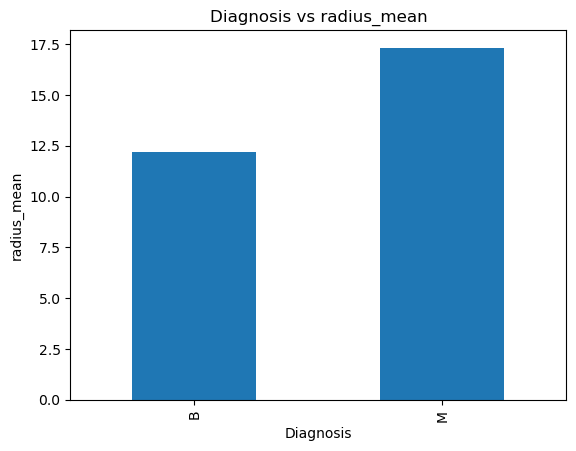

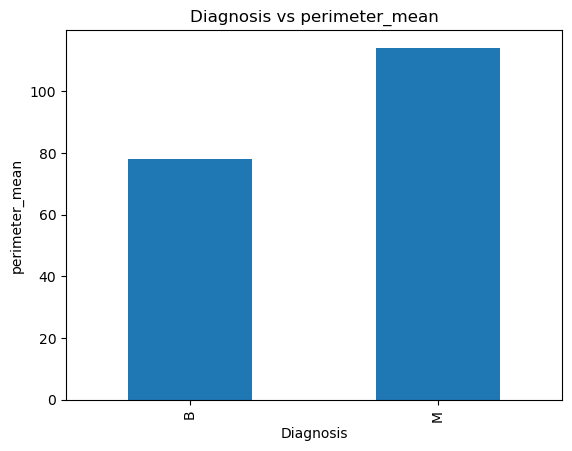

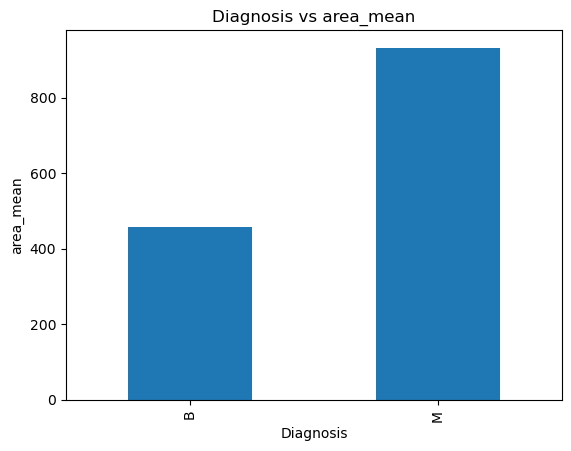

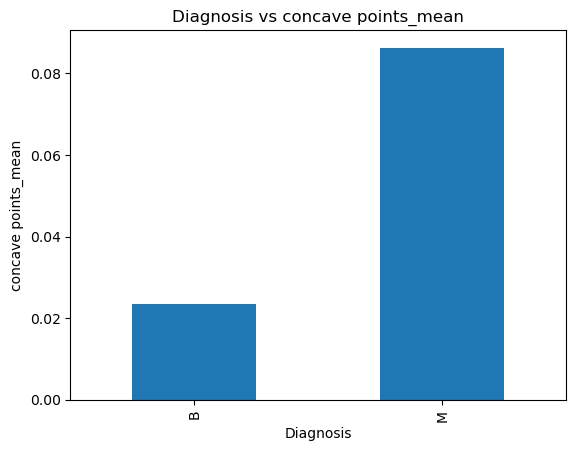

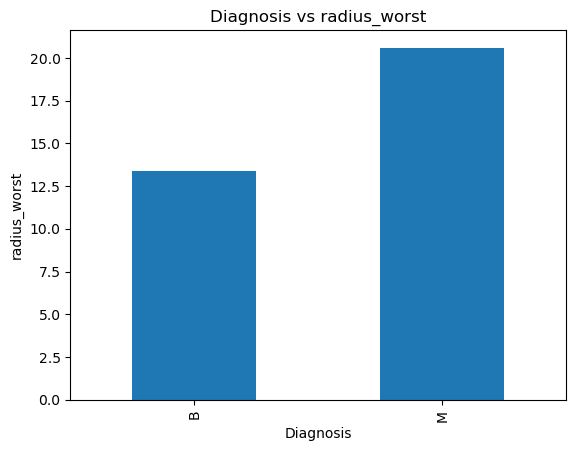

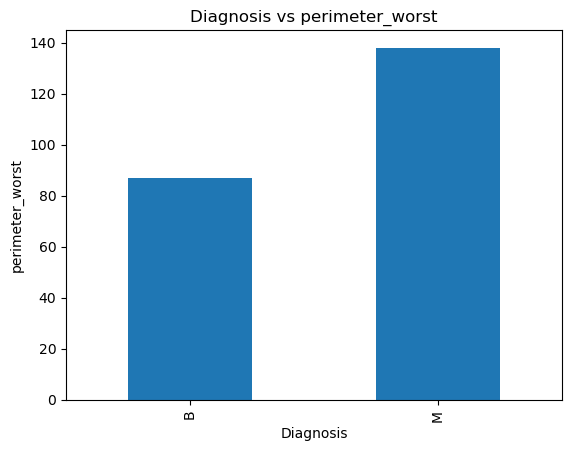

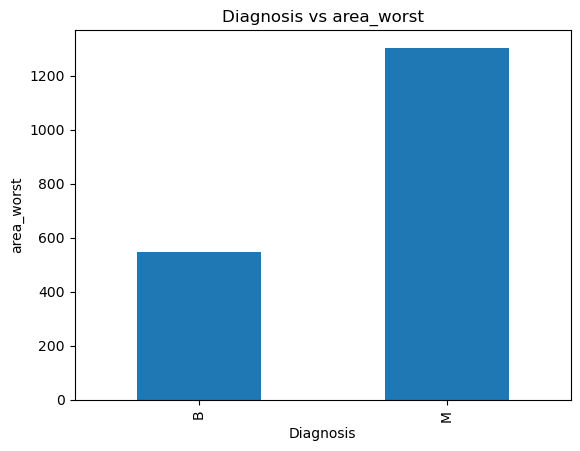

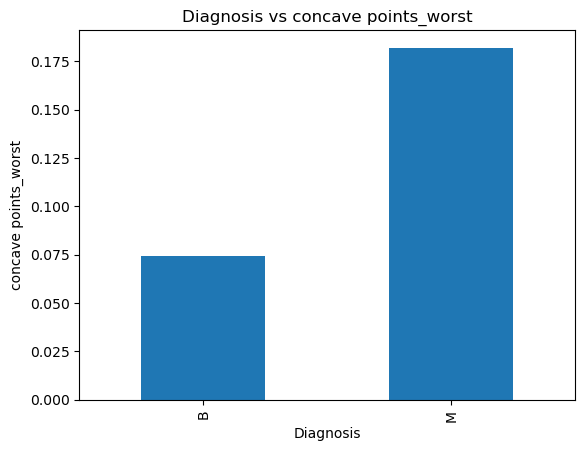

In [116]:

for col in important_features:
    data.groupby('diagnosis')[col].median().plot(kind='bar')
    plt.xlabel('Diagnosis')
    plt.ylabel(col)
    plt.title("Diagnosis vs "+ col)
    plt.show()


### Pairwise Scatter Plot

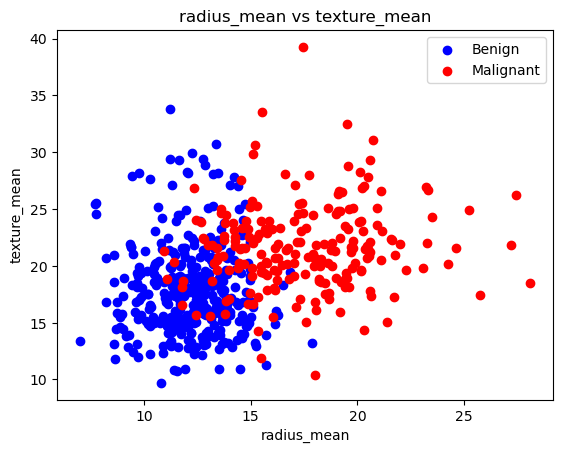

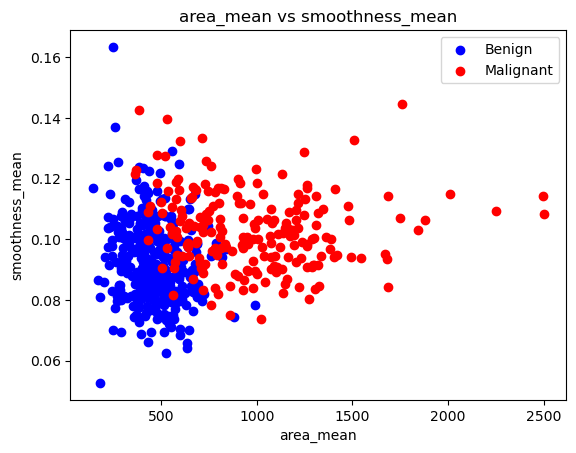

In [117]:
# Pair wise scatter plot for correlation higher than 0.7

benign_data = data[data['diagnosis'] == 'B']
malignant_data = data[data['diagnosis'] == 'M']

def pair_scatter(col1, col2):

    plt.scatter(benign_data[col1], benign_data[col2], color='blue', label='Benign')
    plt.scatter(malignant_data[col1], malignant_data[col2], color='red', label='Malignant')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend()
    plt.title(col1 + ' vs ' + col2)
    plt.show()

pair_scatter('radius_mean', 'texture_mean')
pair_scatter('area_mean', 'smoothness_mean')


### Boxplot

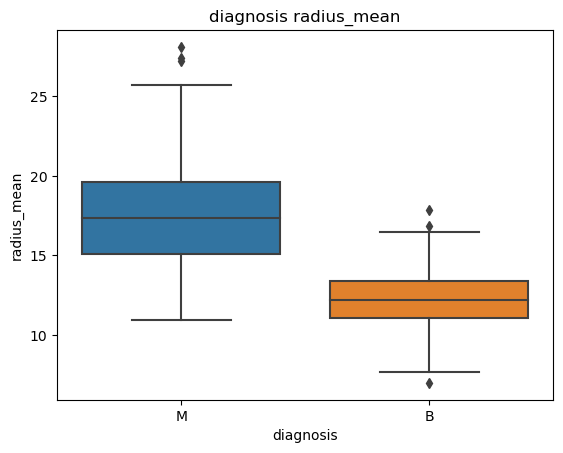

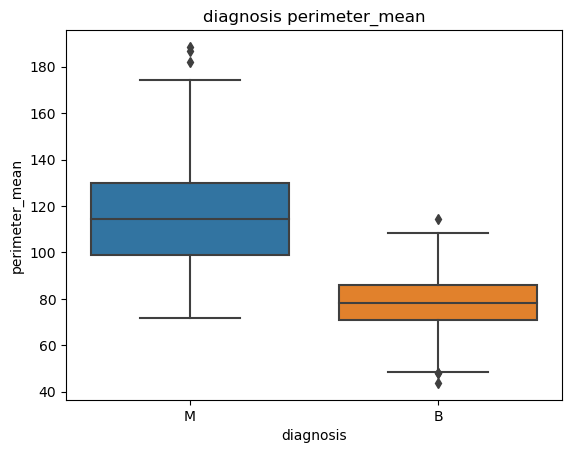

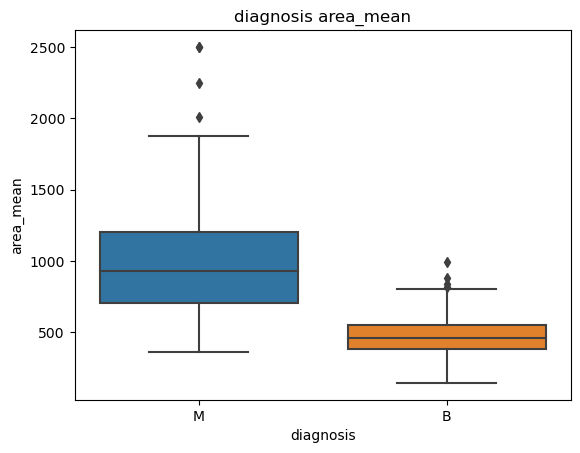

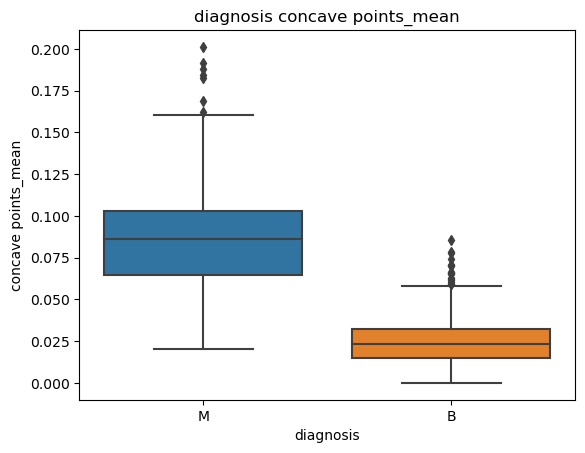

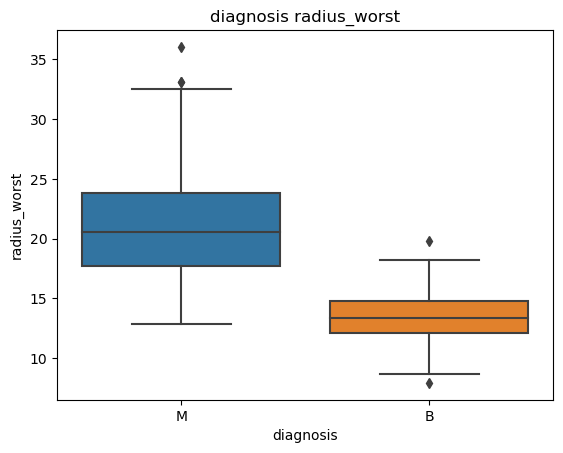

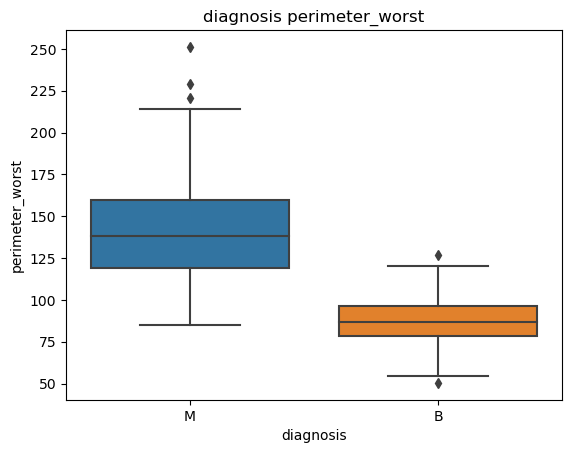

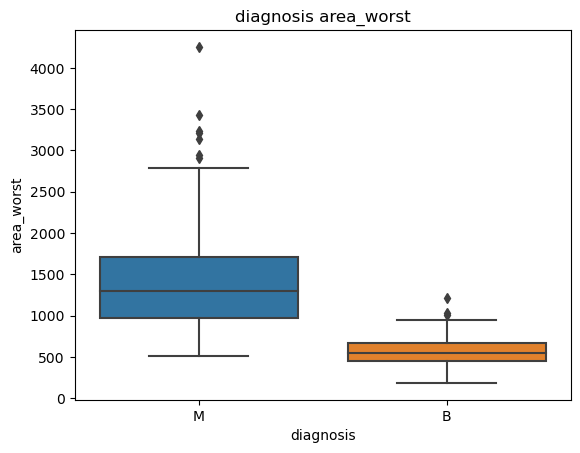

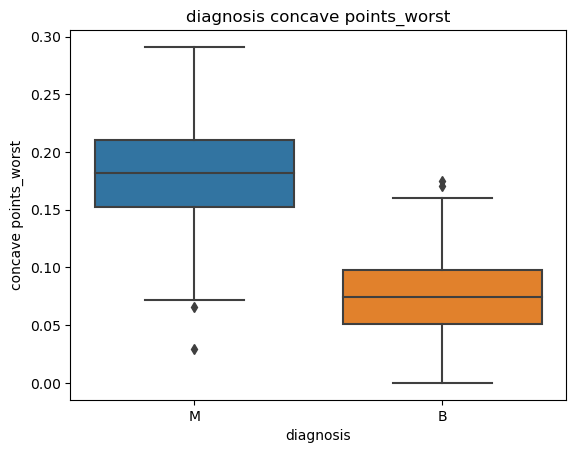

In [118]:
# box plot with numerical data with respect to categorical data


for col in important_features:
    sns.boxplot(data=data, x='diagnosis', y=col)
    plt.xlabel('diagnosis')
    plt.ylabel(col)
    plt.title('diagnosis ' + col)
    plt.show()

### Feature Extraction using Principal Component Analysis

Explained Variance Ratio  [0.42864701 0.18376792]


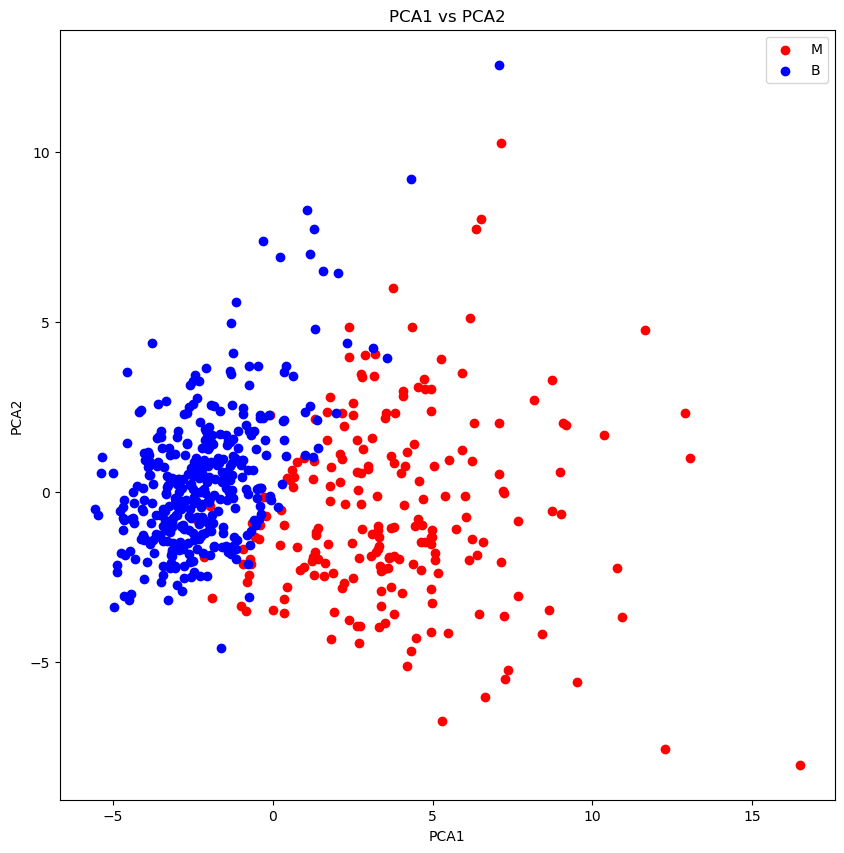

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_df = data.drop('diagnosis', axis=1)

# standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_df)

# apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

pca_data = pd.DataFrame(pca_data, columns=['pca1', 'pca2'])

explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio ", explained_variance)

# visualize the principal components
plt.figure(figsize=(10,10))
colors = {'M': 'red', 'B': 'blue'}

for diagnosis, color in colors.items():
    plt.scatter(
        pca_data['pca1'][data['diagnosis'] == diagnosis],
        pca_data['pca2'][data['diagnosis'] == diagnosis],
        c = color,
        label = diagnosis
    )

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.title('PCA1 vs PCA2')
plt.show()



Explained Variance Ratio  [0.42864701 0.18376792 0.09146436]


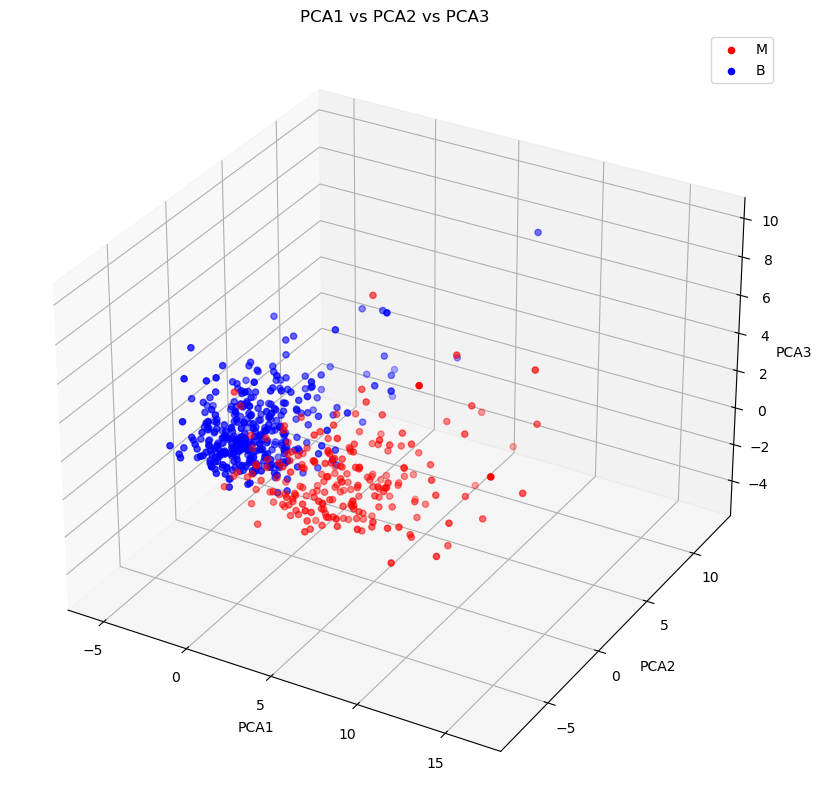

In [120]:
# Principal Component Analysis with n_components = 3

pca_df = data.drop('diagnosis', axis=1)

# standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_df)

# apply PCA
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)

pca_data = pd.DataFrame(pca_data, columns=['pca1', 'pca2', 'pca3'])

explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio ", explained_variance)

# visualize the principal components in 3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
colors = {'M': 'red', 'B': 'blue'}

for diagnosis, color in colors.items():
    ax.scatter(
        pca_data['pca1'][data['diagnosis'] == diagnosis],
        pca_data['pca2'][data['diagnosis'] == diagnosis],
        pca_data['pca3'][data['diagnosis'] == diagnosis],
        c = color,
        label = diagnosis
    )

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.legend()
plt.title('PCA1 vs PCA2 vs PCA3')
plt.show()

Explained Variance Ratio  [0.42864701 0.18376792 0.09146436 0.06391475 0.05318759 0.03982815]


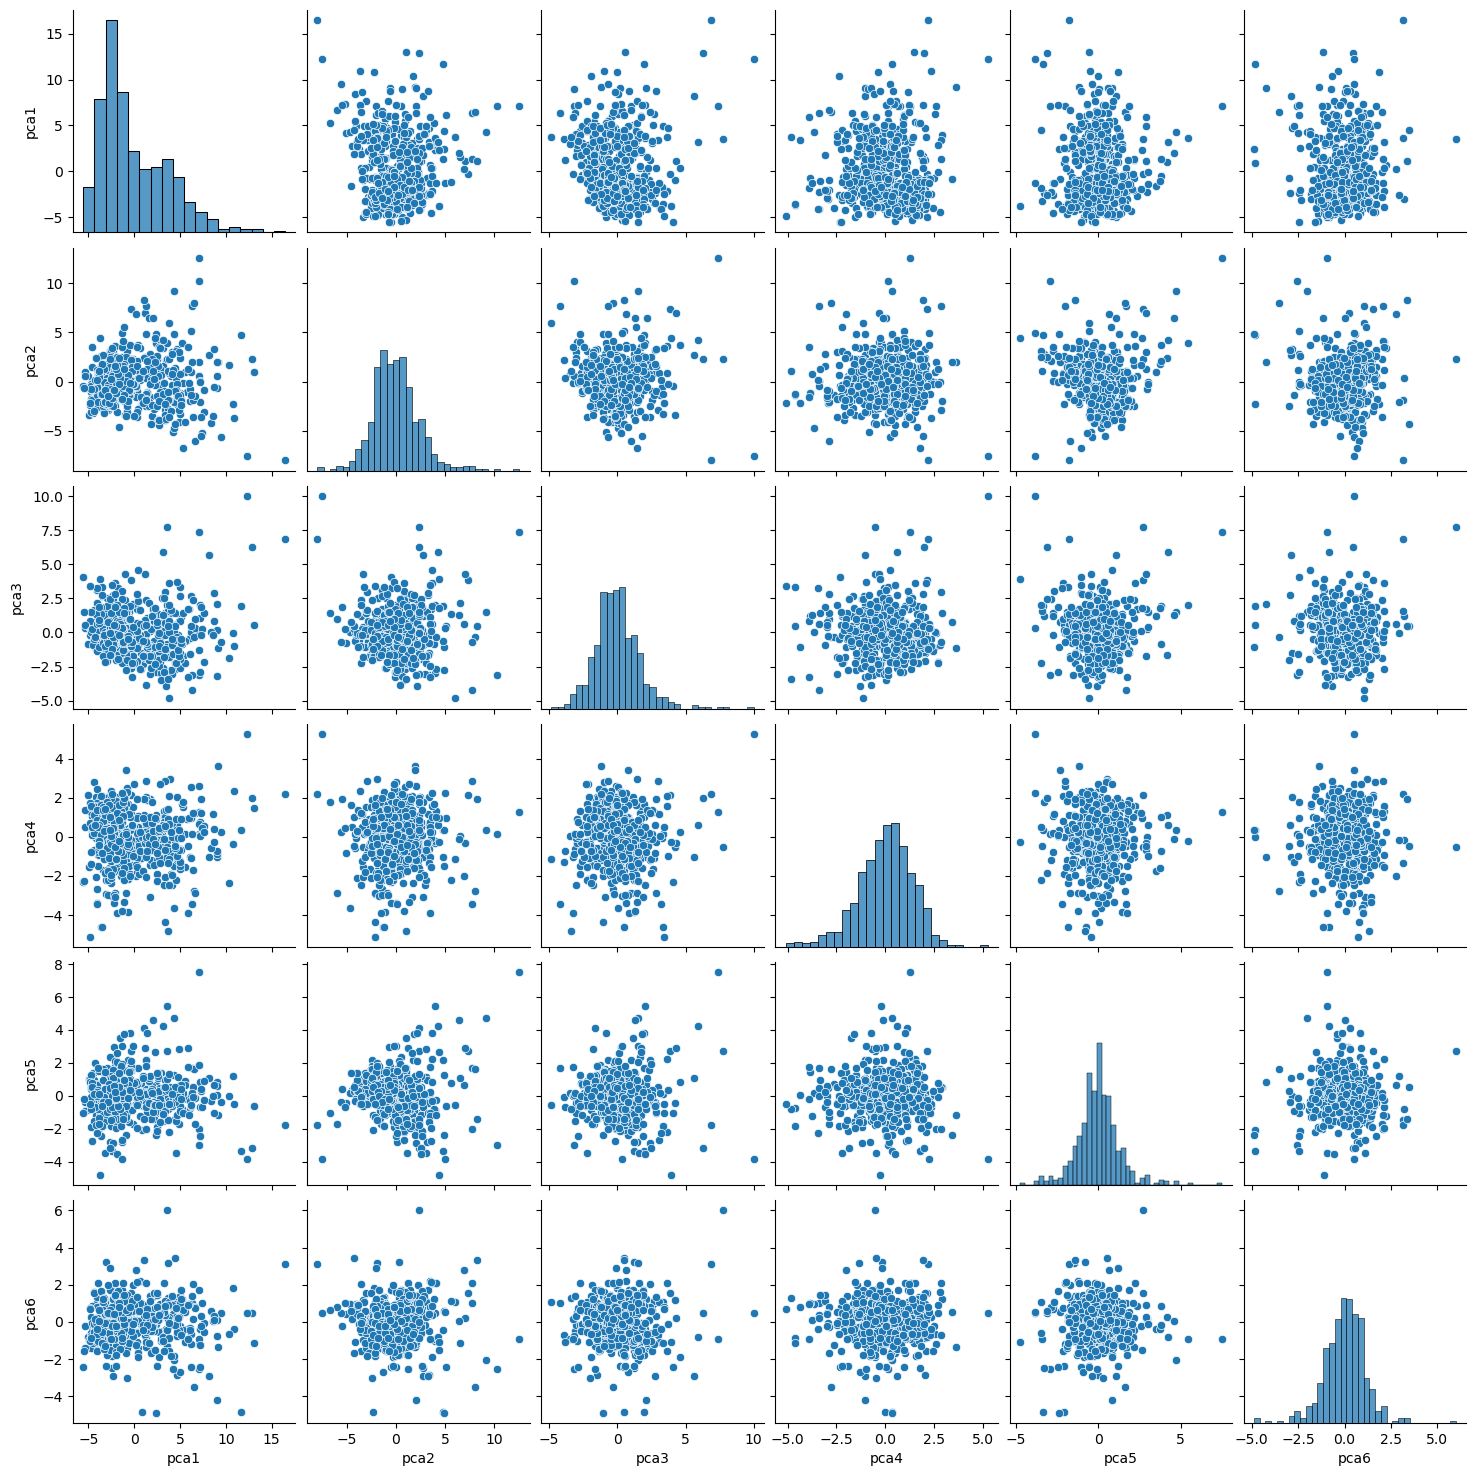

In [121]:
# principal components with n_components = 6

pca_df = data.drop('diagnosis', axis=1)

# standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_df)

# apply PCA
pca = PCA(n_components=6)
pca_data = pca.fit_transform(scaled_data)

pca_data = pd.DataFrame(pca_data, columns=['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6'])

explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio ", explained_variance)

# visualize the principal with n_components = 6
import seaborn as sns

sns.pairplot(pca_data)
plt.show()


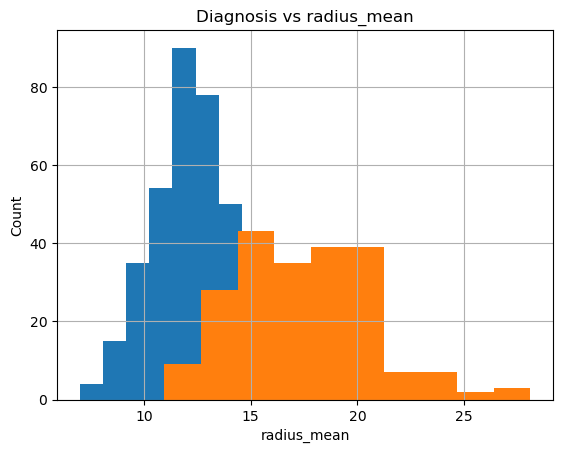

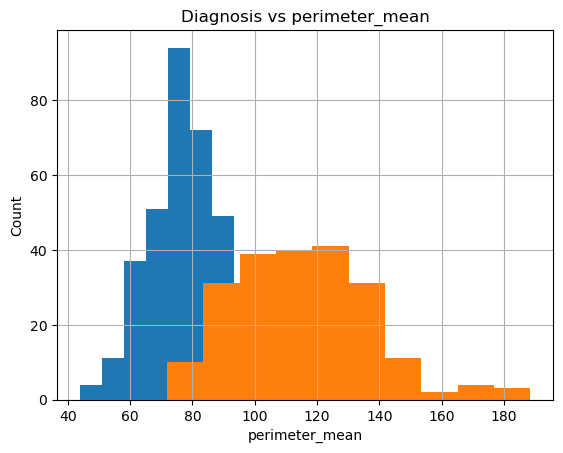

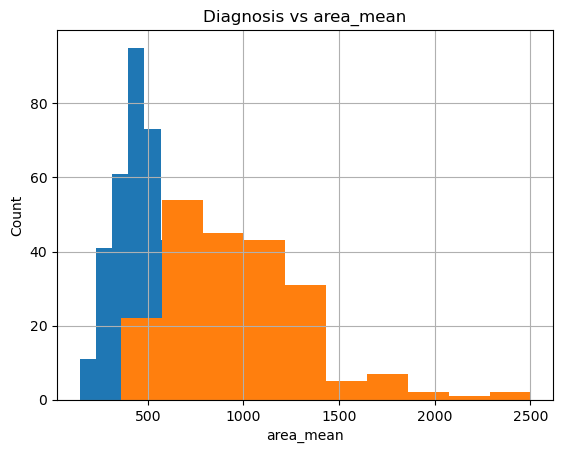

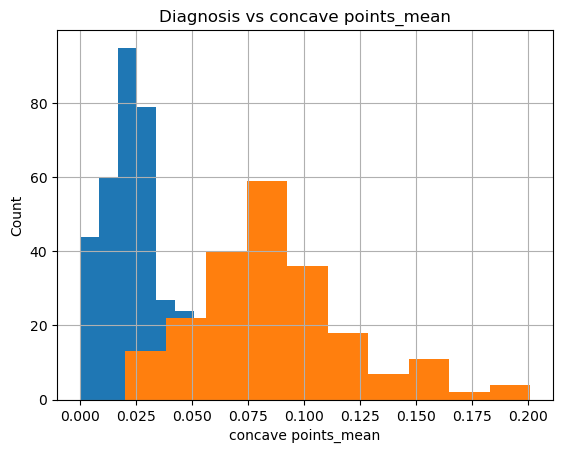

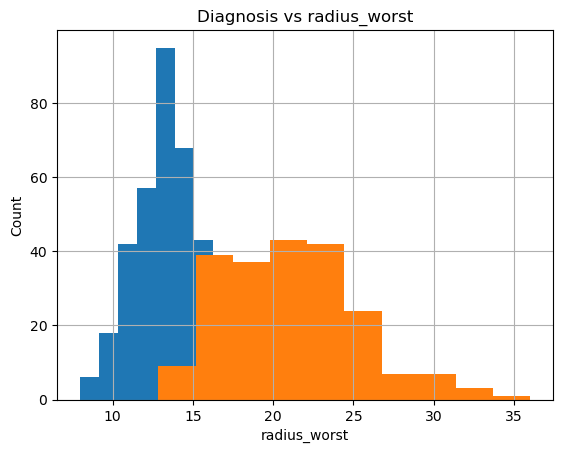

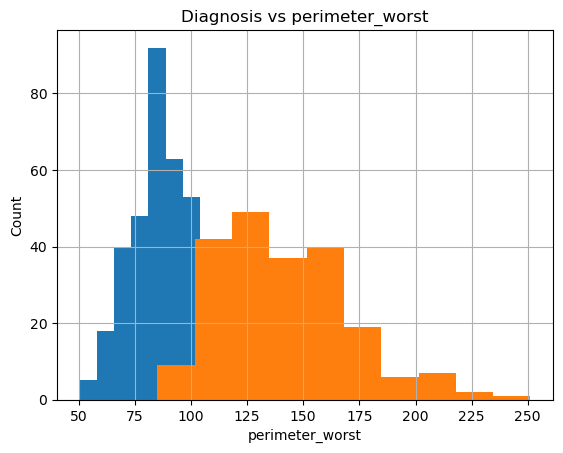

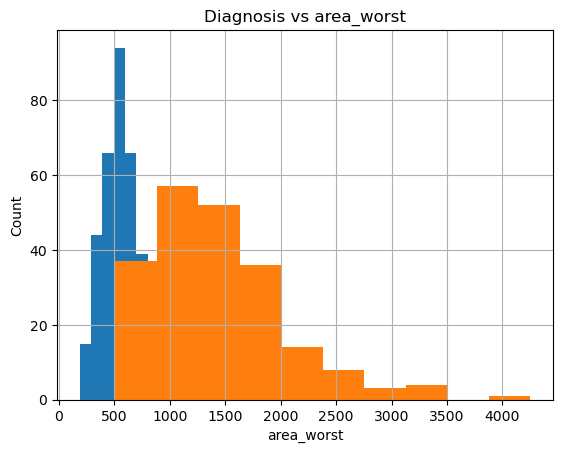

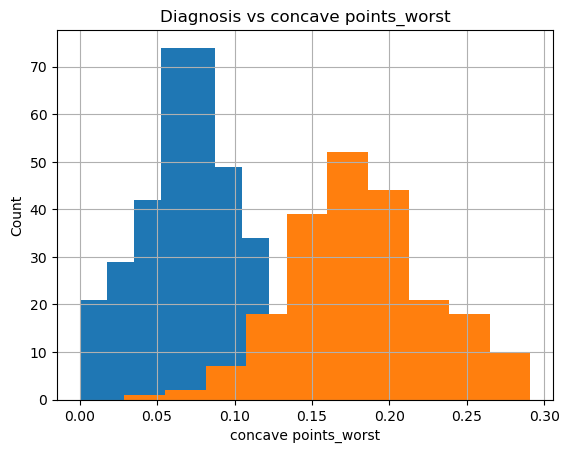

In [122]:
for col in important_features:
    data.groupby('diagnosis')[col].hist()
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('Diagnosis vs '+ col)
    plt.show()
    

### Logistic Regression with Grid search CV

In [123]:
X = data.drop(['diagnosis', 'id'], axis=1)
y = data['diagnosis']

In [124]:
# Normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [125]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [126]:
# Define hyperparameters for Logistic Regression
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg = LogisticRegression()

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

# best parameters
best_params = grid_search.best_params_
print("Best Parameters ", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)

print("Accuracy Score ", accuracy_score(y_test, y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred))
print("Classification Report \n", classification_report(y_test, y_pred))

Best Parameters  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy Score  0.9912280701754386
Confusion Matrix 
 [[71  0]
 [ 1 42]]
Classification Report 
               precision    recall  f1-score   support

           B       0.99      1.00      0.99        71
           M       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

